In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nearest_neighbors import KNN

In [2]:
np.random.seed(42)

n_samples = 200
X = np.random.rand(n_samples, 2) * 10

y = np.zeros(n_samples)
y[X[:, 0] + X[:, 1] > 10] = 1 
k = 5
knn = KNN(k=k)
knn.fit(X)

In [3]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

def predict_class(model, points):
    results = []
    for point in points:
        neighbors = model.predict(point.reshape(1, -1))
        neighbor_classes = y[neighbors[0]]
        results.append(np.bincount(neighbor_classes.astype(int)).argmax())
    return np.array(results)


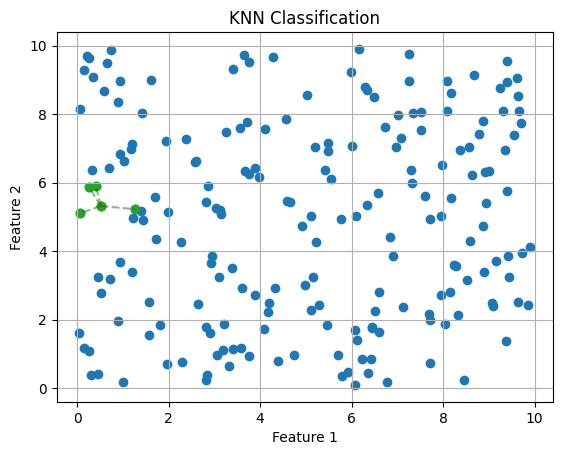

In [4]:
Z = predict_class(knn, np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.scatter(X[:, 0], X[:, 1])

test_idx = 150
test_point = X[test_idx]
neighbors = knn.predict(test_point.reshape(1, -1))[0]

plt.scatter(test_point[0], test_point[1])
plt.scatter(X[neighbors, 0], X[neighbors, 1])

for neighbor_idx in neighbors:
    plt.plot([test_point[0], X[neighbor_idx, 0]], 
             [test_point[1], X[neighbor_idx, 1]], 
             'g--', alpha=0.5)

plt.title('KNN Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
# plt.legend()
plt.grid(True)
plt.show()